#### Instituição de ensino: Digital Innovation One
#### Bootcamp: Banco Carrefour Data Engineer
#### Projeto: Índices de sobrevivência com dados do Titanic
_______________________________________________________________________________

## Dataset
#### Disponível em: https://www.kaggle.com/rahulsah06/titanic?select=train.csv

## Pacotes necessários

In [40]:
import pandas as pd #download da biblioteca Pandas do Python
import numpy as np #download da biblioteca NumPy do Python
from sklearn.ensemble import RandomForestClassifier #download do algoritmo de classificação Árvore Aleatória da biblioteca Scikit-learn
from sklearn.model_selection import train_test_split #download de função auxiliar do Scikit-learn para separar o banco em treino e teste

## Leitura do banco de dados

In [41]:
dados = pd.read_csv('/content/train.csv') #execução da leitura do banco de dados do Titanic

In [42]:
dados.head() #1a. saída da leitura de dados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
dados = dados.drop(['Name','Ticket','Cabin','Embarked'], axis = 1) #exclusão de variáveis irrelevantes para a análise descritiva

In [44]:
dados.head() #2a. saída da leitura de dados em planilha reduzida 

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


## Edição de Chave e Variável Resposta

In [45]:
dados = dados.set_index(['PassengerId']) #criação de chave forte para o index
dados = dados.rename(columns={'Survived':'target'}, inplace= False) #variável Survived é renomeada como variável alvo

In [46]:
dados.head() #3a. saída da leitura de dados com chave index e variável target

,target,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500


## Descritiva

In [47]:
dados.describe() #1a. versão da análise descritiva a partir de variáveis numéricas

,target,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
dados.describe(include= ['O']) # inclusão de variável não numérica (string Sex) na análise

,Sex
count,891
unique,2
top,male
freq,577


## Transformação dos dados

In [49]:
dados['Sex_F'] = np.where(dados['Sex'] == 'female', 1, 0) #transformação de variável não numérica em variável numérica

dados['Pclass_1'] = np.where(dados['Pclass'] == 1, 1, 0) #estratificação da 1ª classe de passageiro do navio
dados['Pclass_2'] = np.where(dados['Pclass'] == 2, 1, 0) #estratificação da 2ª classe de passageiro do navio
dados['Pclass_3'] = np.where(dados['Pclass'] == 3, 1, 0) #estratificação da 3ª classe de passageiro do navio

In [50]:
dados = dados.drop(['Pclass', 'Sex'], axis = 1) #exclusão das colunas originais após transformação dos dados

In [51]:
dados.head() #4a. saída da leitura de dados com as variáveis transformadas (Sex_F, Pclass_1, Pclass_2, Pclass_3)

,target,Age,SibSp,Parch,Fare,Sex_F,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,0,1
2,1,38.0,1,0,71.2833,1,1,0,0
3,1,26.0,0,0,7.9250,1,0,0,1
4,1,35.0,1,0,53.1000,1,1,0,0
5,0,35.0,0,0,8.0500,0,0,0,1


In [52]:
dados.isnull().sum() #resumo de variáveis para verificar onde há dados perdidos

target        0
Age         177
SibSp         0
Parch         0
Fare          0
Sex_F         0
Pclass_1      0
Pclass_2      0
Pclass_3      0
dtype: int64

In [53]:
dados.fillna(0, inplace= True) #preenchimento das colunas dos dados perdidos com zero

In [54]:
dados.isnull().sum() #resumo de variáveis após substituições de dados perdidos

target      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex_F       0
Pclass_1    0
Pclass_2    0
Pclass_3    0
dtype: int64

## Amostragem

In [55]:
x_train, x_test, y_train, y_test = train_test_split(dados.drop(['target'], axis=1), #divisão da amostra conforme a variável alvo
                                                    dados["target"], #parâmetro da divisão é a variável Survived
                                                    test_size = 0.3, #divisao do banco de dados na proporçao 30/70 (teste/treino)
                                                    random_state = 1234) #fixa o resultado de precisão do modelo para reprodução posterior

[{'treino': x_train.shape},{'teste': x_test.shape}] #demonstra a divisão em treino e teste com nro de linhas e colunas para cada banco                                                  

[{'treino': (623, 8)}, {'teste': (268, 8)}]

## Modelo
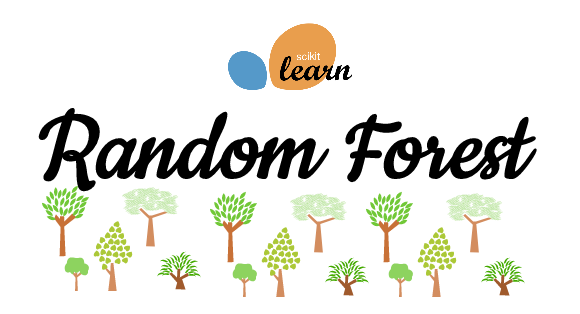

In [56]:
rndforest = RandomForestClassifier(n_estimators= 1000, #criação do modelo com 1000 árvores
                                   criterion= 'gini', #fixa o criterio de análise, gini isola em 1 ramo da árvore a classe mais frequente                              
                                   max_depth= 5) #fixa a profundidade das árvores

rndforest.fit(x_train, y_train) #calcula o modelo de acordo com os parâmetros passados              

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
probabilidade = rndforest.predict_proba(dados.drop('target',axis = 1))[:,1] #predição com regressão da probalidade de sobrevivência 
classificacao = rndforest.predict(dados.drop('target', axis= 1)) #predição com classificação em sobrevivente ou não sobrevivente

In [57]:
dados['probabilidade'] = probabilidade #definição da coluna com resultado da probabilidade
dados['classificacao'] = classificacao #definição da coluna com resultado da classificação

In [58]:
dados #análise final do modelo de ML supervisionado para prever a probabilidade de sobrevivência ao acidente do Titanic

,target,Age,SibSp,Parch,Fare,Sex_F,Pclass_1,Pclass_2,Pclass_3,probabilidade,classificacao
PassengerId,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,0,1,0.128840,0
2,1,38.0,1,0,71.2833,1,1,0,0,0.932805,1
3,1,26.0,0,0,7.9250,1,0,0,1,0.447328,0
4,1,35.0,1,0,53.1000,1,1,0,0,0.912914,1
5,0,35.0,0,0,8.0500,0,0,0,1,0.141917,0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,0,0,1,0,0.132527,0
888,1,19.0,0,0,30.0000,1,1,0,0,0.849399,1
889,0,0.0,1,2,23.4500,1,0,0,1,0.506236,1
